In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
cd ../TileEM/

/home/jlee782/crowd-seg/analysis/TileEM


# Check worker qualities close to the Qjs derived from GT. 

In [3]:
from Qj_pTprime_models import *

In [4]:
my_BBG  = pd.read_csv("my_ground_truth.csv")
os.chdir("sample/5worker_rand0")

In [5]:
Qj=[]
iteration=-1
for objid in range(1,48):
    ground_truth_match = my_BBG[my_BBG.object_id==objid]
    x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
    T = shapely.geometry.Polygon(zip(x_locs,y_locs))
    tiles = pkl.load(open("vtiles{}.pkl".format(objid)))
    workers =pkl.load(open("worker{}.pkl".format(objid)))
    indMat =pkl.load(open("indMat{}.pkl".format(objid)))
    
    Tstar_idx_lst = pkl.load(open("Tstar_idx_obj{}.pkl".format(objid)))
    tile_area = np.array(indMat[-1])
    A_thres = np.median(tile_area[Tstar_idx_lst[iteration-1]])

    for wid in workers:
        j = workers.index(wid)
        qn1,qn2,qp1,qp2 = QjGTLSA(tiles,indMat,T,j,A_thres)
        Qj.append([objid,wid,j,qn1,qn2,qp1,qp2])

Qj_tbl = pd.DataFrame(Qj,columns=["object_id","worker_id","j","Qn1","Qn2","Qp1","Qp2"])

In [11]:
area = indMat[-1]

In [14]:
large_idx = np.where(area>=A_thres)[0]
small_idx = np.where(area<A_thres)[0]

In [ ]:
Tstar_lst = pkl.load(open("Tstar_idx_obj{}.pkl".format(objid)))

check median is ~50%50% area tiles 

In [ ]:
p_idx = 

In [6]:
objid=47
Qj=pkl.load(open("Qj_obj{}.pkl".format(objid)))
pd.DataFrame(Qj[iteration],columns=["Qn1","Qn2","Qp1","Qp2"])

,Qn1,Qn2,Qp1,Qp2
0,0.250,0.545455,0.714286,0.50
1,0.500,0.590909,0.857143,0.50
2,0.750,0.545455,0.714286,0.50
3,0.375,0.318182,1.000000,0.75
4,0.625,0.727273,1.000000,1.00


In [7]:
Qj_tbl[Qj_tbl["object_id"]==objid][['Qn1','Qn2','Qp1','Qp2']]

,Qn1,Qn2,Qp1,Qp2
230,0.3,0.555556,0.8,0.470588
231,0.3,0.555556,0.6,0.411765
232,0.7,0.666667,0.8,0.529412
233,0.3,0.666667,1.0,0.882353
234,0.5,0.444444,1.0,0.294118


In [8]:
objid=12
Qj=pkl.load(open("Qj_obj{}.pkl".format(objid)))
pd.DataFrame(Qj[iteration],columns=["Qn1","Qn2","Qp1","Qp2"])

,Qn1,Qn2,Qp1,Qp2
0,0.416667,0.142857,1.0,1.0
1,0.916667,0.785714,1.0,0.6
2,0.500000,0.357143,0.8,1.0
3,0.500000,0.642857,0.6,0.8
4,0.583333,0.500000,1.0,1.0


In [9]:
Qj_tbl[Qj_tbl["object_id"]==objid][['Qn1','Qn2','Qp1','Qp2']]

,Qn1,Qn2,Qp1,Qp2
55,0.3125,0.000000,1,0.8
56,0.6875,0.888889,1,0.5
57,0.4375,0.444444,1,0.9
58,0.5000,0.777778,1,0.7
59,0.4375,0.222222,1,0.5


##### $\therefore$ worker qualities looks pretty close to the Qjs derived from GT. 

# Check if T' for sampled bounding box has any PR or p(T') better than individual workers 

# Check if vtiles looks good for every object in every iteration 

In [2]:
from BB2TileExact import *

In [4]:
worker_Nbatches={5:10,10:8,15:6,20:4,25:2,30:1}
sampleN_lst=worker_Nbatches.keys()
len(sampleN_lst[2:])*5*len(range(1,48))

940

In [4]:
cd analysis/TileEM/

[Errno 2] No such file or directory: 'analysis/TileEM/'
/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [5]:
from BB2TileExact import *

In [5]:
mkdir vtile_plots

In [4]:
problematic_vtiles=[[5,0,13],[5,1,10],[5,1,36],[5,1,43],[5,1,44],[5,2,1],[5,2,10],\
                    [5,2,32],[5,3,8],[5,3,20],[5,3,6],[5,5,13],[5,6,30],[5,8,2],\
                    [5,8,25],[5,9,41],[10,0,25],[10,0,37],[10,0,41],[10,1,18],\
                   [10,1,28],[10,1,34],[10,1,35],[10,1,42],[10,2,8],[10,2,25],\
                   [10,2,28],[10,2,37],[10,2,38],[10,3,20],[10,4,42],[10,5,7],\
                   [10,5,41],[10,6,17],[10,6,32],[10,7,34],[10,7,35],[10,7,43]]

In [7]:
np.array(problematic_vtiles)[:,-1]

array([13, 10, 36, 43, 44,  1, 10, 32,  8, 20,  6, 13, 30,  2, 25, 41, 25,
       37, 41, 18, 28, 34, 35, 42,  8, 25, 28, 37, 38, 20, 42,  7, 41, 17,
       32, 34, 35, 43])

KeyboardInterrupt: 

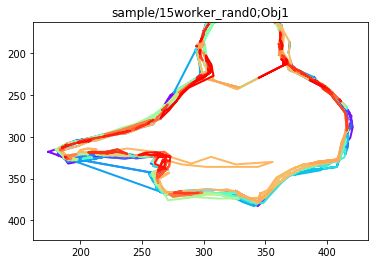

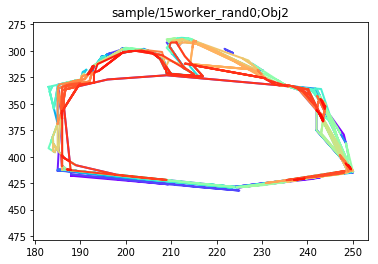

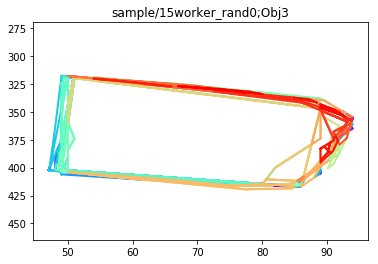

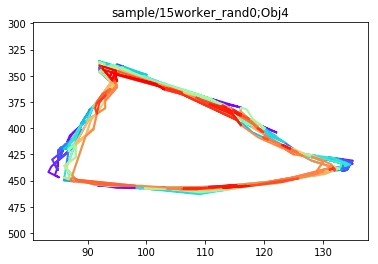

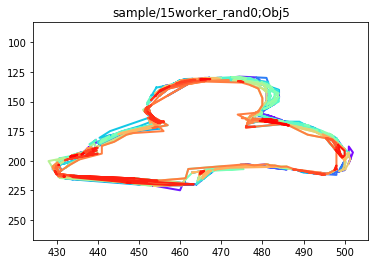

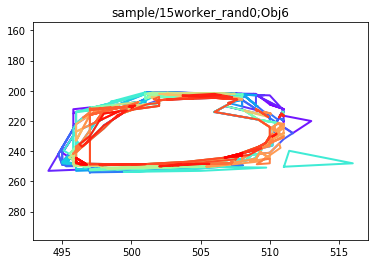

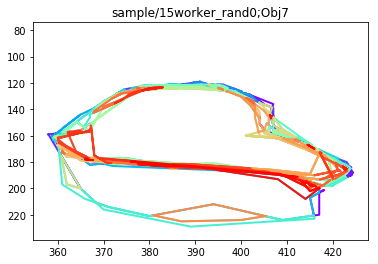

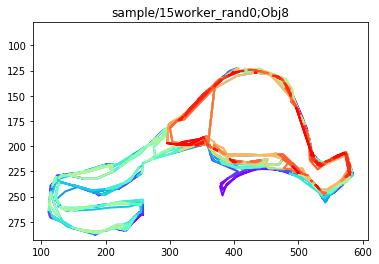

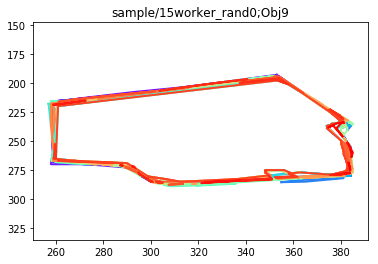

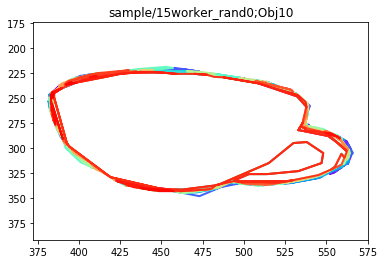

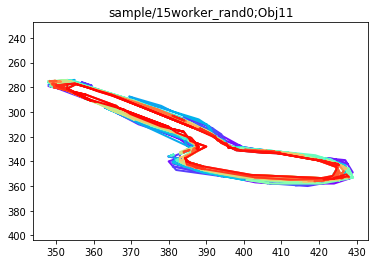

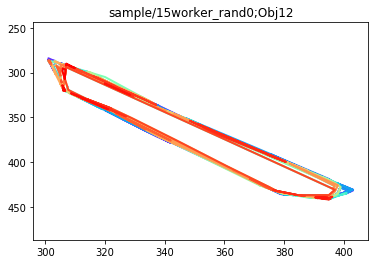

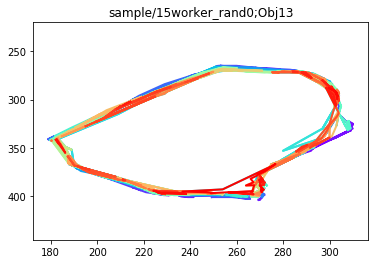

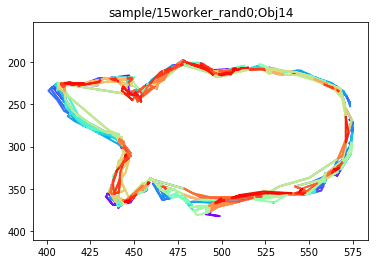

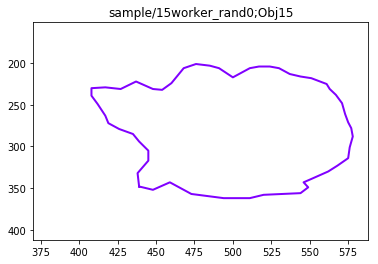

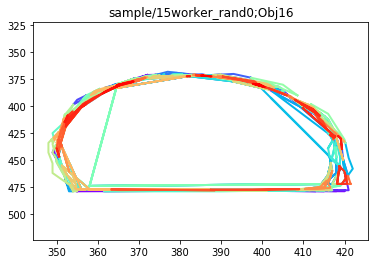

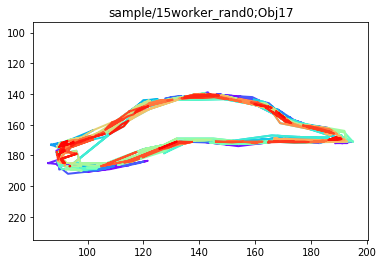

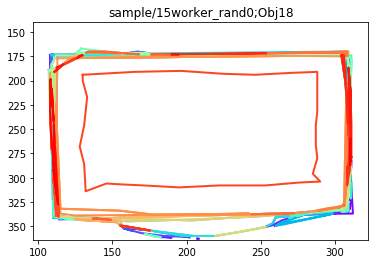

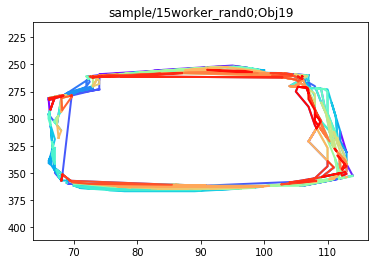

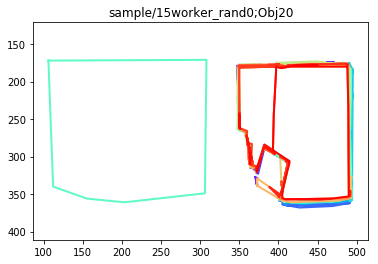

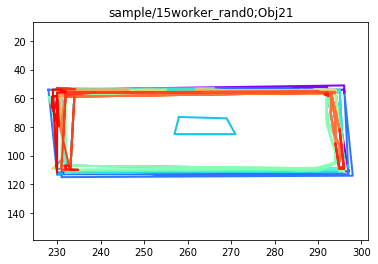

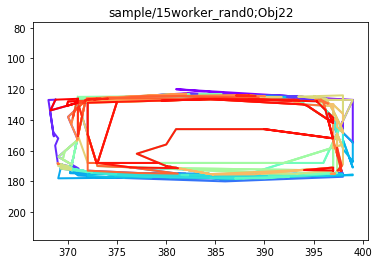

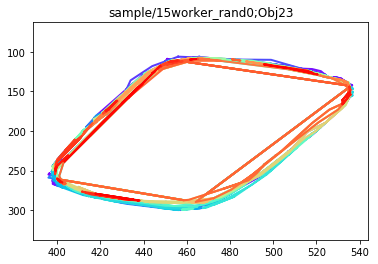

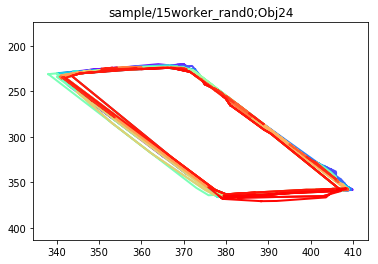

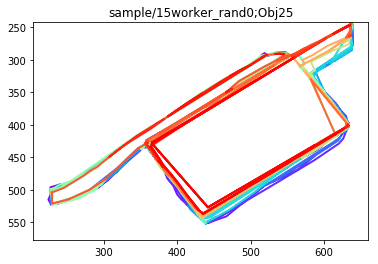

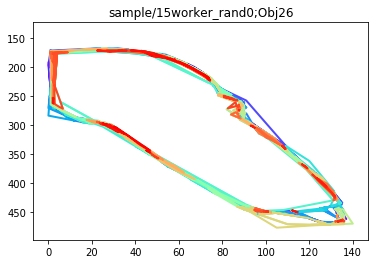

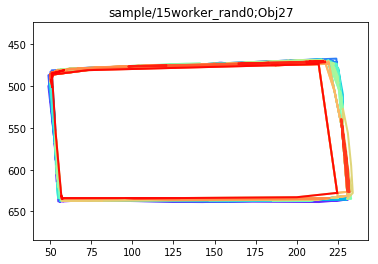

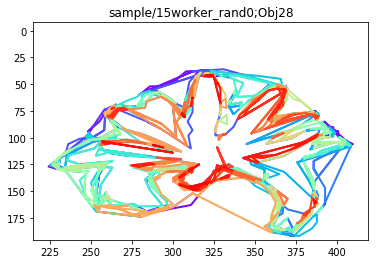

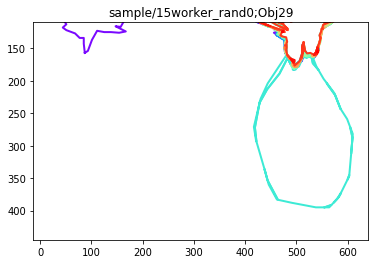

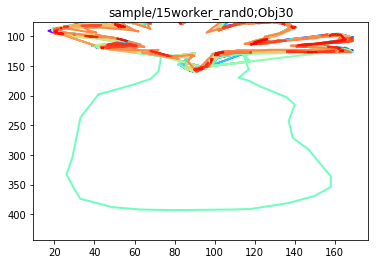

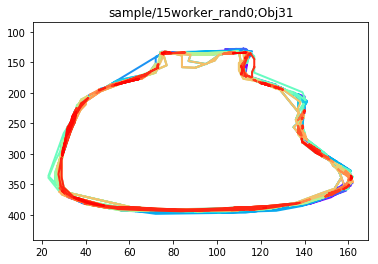

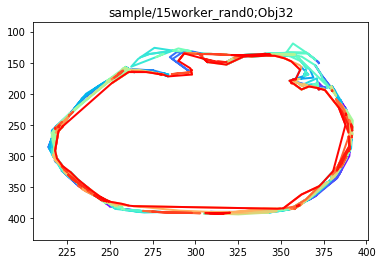

In [ ]:
#for Nworker in sampleN_lst:
Nworker=15
for batch_num in range(worker_Nbatches[Nworker]):
    dir_name = "sample/{0}worker_rand{1}".format(Nworker,batch_num)
    for objid in range(1,48):
        tiles = pkl.load(open(dir_name+"/vtiles{}.pkl".format(objid)))
        visualizeTilesSeparate(tiles)
        plt.title(dir_name+";Obj{}".format(objid))
        plt.savefig("vtile_plots/{0}worker_rand{1}_obj{2}.png".format(Nworker,batch_num,objid))

In [5]:
worker_Nbatches={5:10,10:8,15:6,20:4,25:2,30:1}
sampleN_lst=worker_Nbatches.keys()
for Nworker in sampleN_lst[3:]:
    for batch_num in range(worker_Nbatches[Nworker]):
        dir_name = "sample/{0}worker_rand{1}".format(Nworker,batch_num)
        for objid in range(1,48):
            tiles = pkl.load(open(dir_name+"/vtiles{}.pkl".format(objid)))
            visualizeTilesSeparate(tiles)
            plt.title(dir_name+";Obj{}".format(objid))
            plt.savefig("vtile_plots/{0}worker_rand{1}_obj{2}.png".format(Nworker,batch_num,objid))

In [15]:
#sampleN,batch_num,objid
problematic_vtiles=[[5,0,13],[5,1,10],[5,1,36],[5,1,43],[5,1,44],[5,2,1],[5,2,10],\
                    [5,2,32],[5,3,8],[5,3,20],[5,3,6],[5,5,13],[5,6,30],[5,8,2],\
                    [5,8,25],[5,9,41],[10,0,25],[10,0,37],[10,0,41],[10,1,18],\
                   [10,1,28],[10,1,34],[10,1,35],[10,1,42],[10,2,8],[10,2,25],\
                   [10,2,28],[10,2,37],[10,2,38],[10,3,20],[10,4,42],[10,5,7],\
                   [10,5,41],[10,6,17],[10,6,32],[10,7,34],[10,7,35],[10,7,43]]
medium_severity=[[5,1,3],[5,2,4],[5,2,7],[5,2,11],[5,2,14],[5,2,19],[5,2,22],\
                 [5,3,13],[5,3,40],[5,3,2],[5,3,5],[5,3,19],[5,5,7],\
                 [5,6,22],[5,6,25],[5,6,39],[5,7,28],[5,8,28],[5,8,32],\
                [10,0,7],[10,0,14],[10,0,18],[10,1,19],[10,1,30],[10,1,44],\
                 [10,1,45],[10,3,13],[10,3,37],[10,5,19],[10,6,6],[10,7,3],[10,7,37]]

# ?? = [5,3,22],[5,7,22],[5,9,15],[10,1,22],[10,2,15],[10,3,15],[10,3,22],[10,4,22],[10,5,22]#only 1 BB?